# Tutorial 14 - Scatter Plots with `pandas`

The purpose of this tutorial is to demonstrate the `pandas` built-in functionality for creating scatter plots.

The financial task we will accomplish is demonstrating SPY's *implied leverage effect*:  when the market suffers losses, implied volatilty increases; when the market experiences gains, implied volatility decreases.

Our measure of SPY implied volatility will be the VIX index.  To verify the above relationship, we will plot SPY daily returns against daily changes in the VIX for 2014-2018.

### Loading Packages

Let's begin by loading the packages we will need.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

### Wrangling SPY Data

Next, let's read in the SPY price data from 2014-2018:

In [2]:
df_spy = pd.read_csv('../data/spy_2014_2018.csv')
df_spy.head()

,date,open,high,low,close,volume,adjusted
0,2014-01-02,183.979996,184.070007,182.479996,182.919998,119636900,165.662872
1,2014-01-03,183.229996,183.600006,182.630005,182.889999,81390600,165.635696
2,2014-01-06,183.490005,183.559998,182.080002,182.360001,108028200,165.155701
3,2014-01-07,183.089996,183.789993,182.949997,183.479996,86144200,166.170044
4,2014-01-08,183.449997,183.830002,182.889999,183.520004,96582300,166.206268


Next, we refactor the `date` column as a `dtype` of `datetime`.

In [3]:
df_spy['date'] = pd.to_datetime(df_spy['date'])

Finally, let's calculate the daily log-returns from the `adjusted` prices:

In [4]:
df_spy['return'] = np.log(df_spy['adjusted']).diff()
df_spy.head()

,date,open,high,low,close,volume,adjusted,return
0,2014-01-02,183.979996,184.070007,182.479996,182.919998,119636900,165.662872,NaN
1,2014-01-03,183.229996,183.600006,182.630005,182.889999,81390600,165.635696,-0.000164
2,2014-01-06,183.490005,183.559998,182.080002,182.360001,108028200,165.155701,-0.002902
3,2014-01-07,183.089996,183.789993,182.949997,183.479996,86144200,166.170044,0.006123
4,2014-01-08,183.449997,183.830002,182.889999,183.520004,96582300,166.206268,0.000218


### Wrangling VIX Data

The second data set that we are going to need is the VIX data from 2014-2018:

In [5]:
df_vix_all = pd.read_csv('../data/vix_2014_2018.csv')
df_vix_all.head()

,date,open,high,low,close,volume,adjusted
0,2014-01-02,14.32,14.59,14.00,14.23,0,14.23
1,2014-01-03,14.06,14.22,13.57,13.76,0,13.76
2,2014-01-06,13.41,14.00,13.22,13.55,0,13.55
3,2014-01-07,12.38,13.28,12.16,12.92,0,12.92
4,2014-01-08,13.04,13.24,12.86,12.87,0,12.87


We only want the `date` and the `close` columns, so let's create a new `DataFrame` by copying these two columns.

In [6]:
df_vix = df_vix_all[['date', 'close']].copy()
df_vix.head()

,date,close
0,2014-01-02,14.23
1,2014-01-03,13.76
2,2014-01-06,13.55
3,2014-01-07,12.92
4,2014-01-08,12.87


**Knowledge Challenge:** What is the difference between using `.copy()` and not using `.copy()` in the code above?

With our newly copied data, `df_vix`, let's refactor the `date` column to be a `datetime`. 

In [7]:
df_vix['date'] = pd.to_datetime(df_vix['date'])
df_vix.dtypes

date     datetime64[ns]
close           float64
dtype: object

To help keep things organized down the road, we will rename the `close` column and call it `vix`.

In [8]:
df_vix.rename({'close':'vix'}, axis='columns', inplace=True)
df_vix.head()

,date,vix
0,2014-01-02,14.23
1,2014-01-03,13.76
2,2014-01-06,13.55
3,2014-01-07,12.92
4,2014-01-08,12.87


Let's calculate the daily change in the VIX, and put it in a new column called `vix_chg`.

In [9]:
df_vix['vix_chng'] = df_vix['vix'].diff()
df_vix.head()

,date,vix,vix_chng
0,2014-01-02,14.23,NaN
1,2014-01-03,13.76,-0.47
2,2014-01-06,13.55,-0.21
3,2014-01-07,12.92,-0.63
4,2014-01-08,12.87,-0.05


The `return` column in `df_spy` is expressed as a decimal, so let's change the `vix` and `vix_chng` columns of `df_vix` to also be expressed as decimals.

In [10]:
df_vix['vix'] = df_vix['vix'] / 100
df_vix['vix_chng'] = df_vix['vix_chng'] / 100
df_vix.head()

,date,vix,vix_chng
0,2014-01-02,0.1423,NaN
1,2014-01-03,0.1376,-0.0047
2,2014-01-06,0.1355,-0.0021
3,2014-01-07,0.1292,-0.0063
4,2014-01-08,0.1287,-0.0005


### Adding `vix` and `vix_chng` to `df_spy`

We next add the `vix` and `vix_chng` columns to `df_spy` by joining together the two tables with `pd.merge()`.  

We use the `date` columns to match entries of the two tables.

In [11]:
df_spy = pd.merge(df_spy, df_vix, on=['date'])
df_spy.head()

,date,open,high,low,close,volume,adjusted,return,vix,vix_chng
0,2014-01-02,183.979996,184.070007,182.479996,182.919998,119636900,165.662872,NaN,0.1423,NaN
1,2014-01-03,183.229996,183.600006,182.630005,182.889999,81390600,165.635696,-0.000164,0.1376,-0.0047
2,2014-01-06,183.490005,183.559998,182.080002,182.360001,108028200,165.155701,-0.002902,0.1355,-0.0021
3,2014-01-07,183.089996,183.789993,182.949997,183.479996,86144200,166.170044,0.006123,0.1292,-0.0063
4,2014-01-08,183.449997,183.830002,182.889999,183.520004,96582300,166.206268,0.000218,0.1287,-0.0005


### Scatter Plot

Now that we have our data wrangled, we are in position to use the `DataFrame.plot.scatter()` method to plot daily SPY return against daily changes in the VIX.

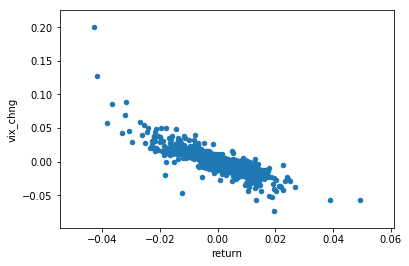

In [12]:
df_spy.plot.scatter('return', 'vix_chng');

The following code improves the aesthetics of our plot:

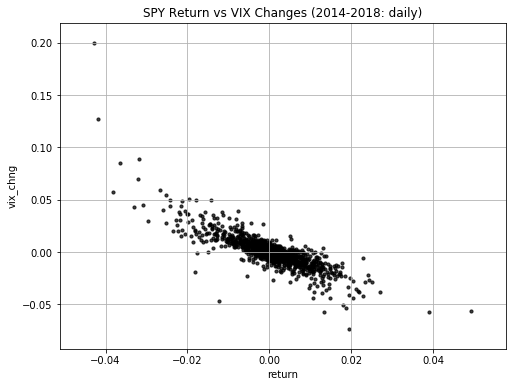

In [13]:
df_spy.plot.scatter(
    x = 'return'
    , y = 'vix_chng'
    , grid=True   
    , c='k'
    , alpha=0.75
    , s=10  # changing the size of the dots
    , figsize=(8, 6)
    , title='SPY Return vs VIX Changes (2014-2018: daily)'
);